# **Detecting Parkinson’s Disease with XGBoost**

In [2]:
!pip install sklearn
!pip install xgboost


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
import os, sys
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
import pandas as pd

# Replace 'your_file.data' with the path to your .data file
file_path = 'parkinsons.data'

# Read the .data file into a DataFrame
data= pd.read_csv(file_path, sep='\t', header=None)

df1 = data

# Display the first few rows of the DataFrame
df=pd.DataFrame(df1)
print(df.head())



                                                   0
0  name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDV...
1  phon_R01_S01_1,119.99200,157.30200,74.99700,0....
2  phon_R01_S01_2,122.40000,148.65000,113.81900,0...
3  phon_R01_S01_3,116.68200,131.11100,111.55500,0...
4  phon_R01_S01_4,116.67600,137.87100,111.36600,0...


In [ ]:
import pandas as pd

# Replace 'your_file.data' with the path to your .data file
file_path = 'parkinsons.data'

# Read the .data file into a DataFrame, explicitly specifying the delimiter and header
# The data file likely has a header row, so we set header=0 to use the first row as headers
data = pd.read_csv(file_path, sep=',', header=0)  # Change sep to ',' if comma-separated

df1 = data

# Display the first few rows of the DataFrame
df = pd.DataFrame(df1)
print(df.head())


#DataFlair - Get the features and labels
features = df.loc[:, df.columns != 'status'].values[:, 1:]
labels = df.loc[:, 'status'].values

             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.0654

In [ ]:
#DataFlair - Get the count of each label (0 and 1) in labels
print(labels[labels==1].shape[0], labels[labels==0].shape[0])

147 48


In [ ]:
#DataFlair - Scale the features to between -1 and 1
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(features)
y=labels

In [ ]:
#DataFlair - Split the dataset
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=7)

In [ ]:
#DataFlair - Train the model
model=XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# DataFlair - Calculate the accuracy
y_pred=model.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)

94.87179487179486


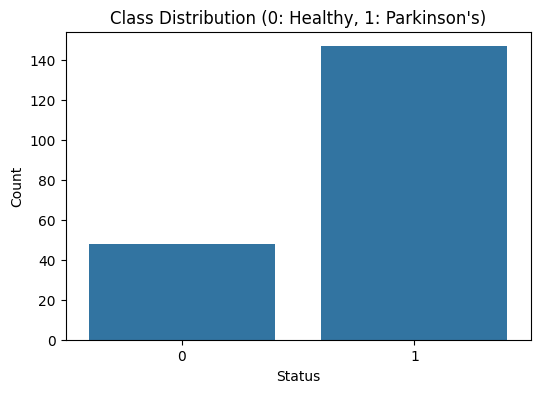

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each class (0 and 1)
class_counts = df['status'].value_counts()

# Create a bar plot
plt.figure(figsize=(6, 4))
sns.countplot(x='status', data=df)
plt.title('Class Distribution (0: Healthy, 1: Parkinson\'s)')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

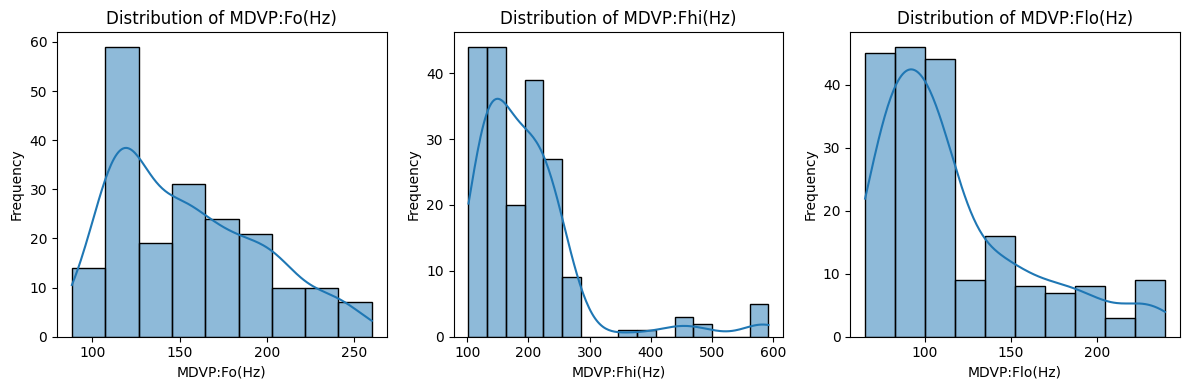

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select some features to visualize
features_to_visualize = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)']

# Create histograms for the selected features
plt.figure(figsize=(12, 4))
for i, feature in enumerate(features_to_visualize):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[feature], kde=True)  # kde adds a kernel density estimate
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

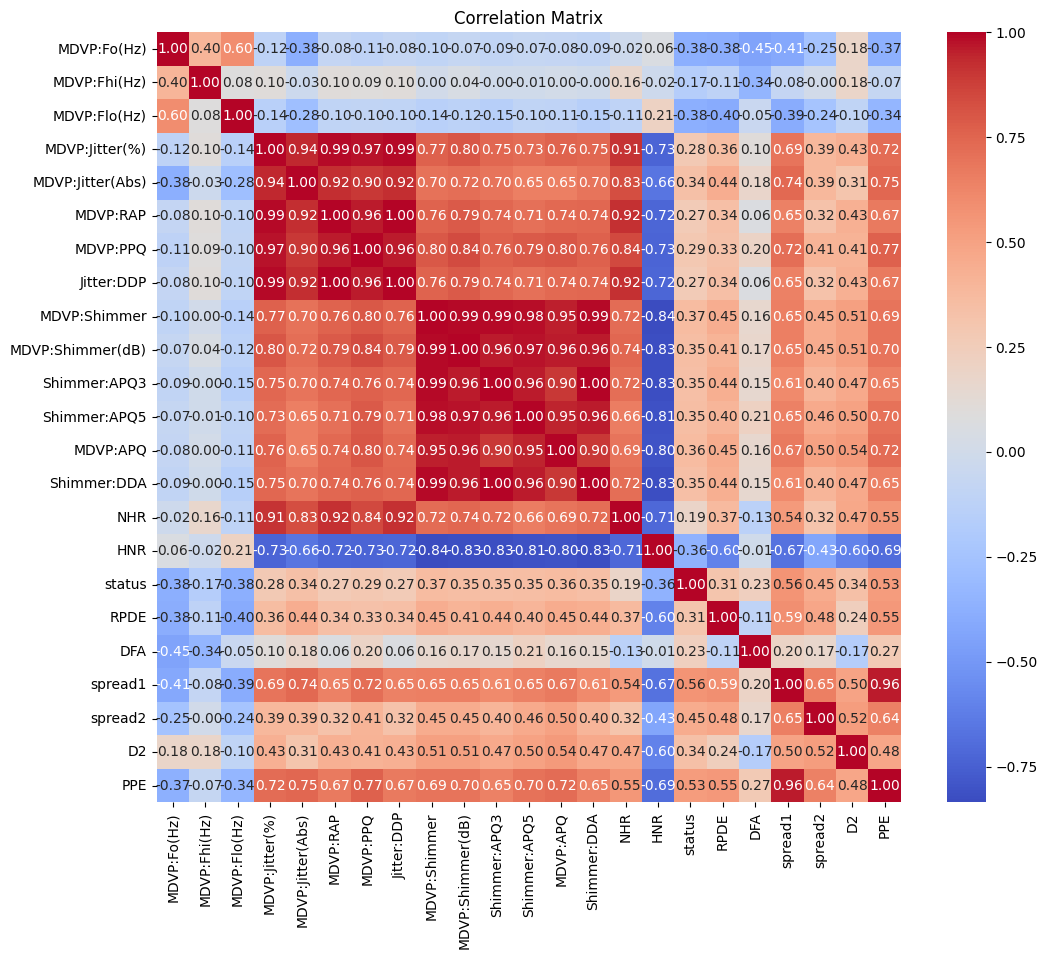

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np  # Import numpy


# Calculate the correlation matrix, but only for numeric columns
correlation_matrix = df.select_dtypes(include=np.number).corr()  # Use np.number

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

<Figure size 1000x600 with 0 Axes>

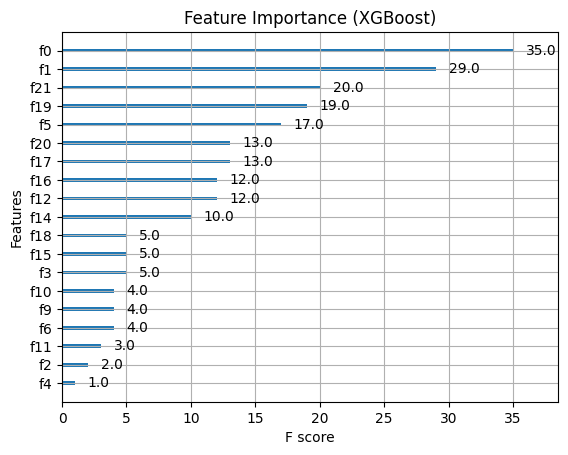

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Get feature importance from the trained XGBoost model
importance = model.feature_importances_

# Create a bar plot of feature importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(model, importance_type='weight')
plt.title('Feature Importance (XGBoost)')
plt.show()